<b>The document is the modelling part which consist of several models. I chose LogisticRegression, RandomForestClassifier, DecisionTreeClassifier as the main model that apply to the Question 1 and 2.and

Questions 1 : Classification of the Job Salary by using Classification method and aim to identify the features that affect the above average salary.
Questions 2 : Classificationcation of the Job category. Identify the potential feature that can describe the data scientist job. 

 First of all, import the necessary libraries that need to use such as pandas, numpy, seaborn, and matplotlib. The additional library that I will mainly use is sklearn to do Natural language processing

In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.feature_extraction.text import HashingVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_predict,cross_val_score,cross_validate
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import scipy.stats as stats
import string
import re
from nltk.corpus import stopwords
from collections import Counter
plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Import the data frame and have look at the dataframe and shape of data

In [123]:
df=pd.read_csv('data_science.csv')
print(df.shape)

(1380, 10)


In [124]:
df.head(2)

,Unnamed: 0,title,job_teaser,advertiser,work_type,classification,location,job_description,estimated_salary,above_ave_salary
0,2,Big Data Engineer - Machine Learning,Are you ready to use machine learning in one o...,Morgan McKinley,Full Time,Science & Technology,Sydney,Due to fantastic growth this organisation are ...,55000.0,0
1,4,SSIS/Data Engineer,Randstad has partnered with an industry leadin...,Randstad Technologies,Full Time,Information & Communication Technology,Melbourne,Randstad has partnered with an industry leadin...,55000.0,0


I decided to drop colum Unnamed: 0 as it is redundent with the index

In [223]:
df.title.str.contains("data")

0       False
1       False
2       False
3       False
4       False
        ...  
1375    False
1376    False
1377    False
1378    False
1379    False
Name: title, Length: 1380, dtype: bool

In [125]:
df=df.drop(columns='Unnamed: 0')
df.head(2)

,title,job_teaser,advertiser,work_type,classification,location,job_description,estimated_salary,above_ave_salary
0,Big Data Engineer - Machine Learning,Are you ready to use machine learning in one o...,Morgan McKinley,Full Time,Science & Technology,Sydney,Due to fantastic growth this organisation are ...,55000.0,0
1,SSIS/Data Engineer,Randstad has partnered with an industry leadin...,Randstad Technologies,Full Time,Information & Communication Technology,Melbourne,Randstad has partnered with an industry leadin...,55000.0,0


# EDA

Check the null value in the data frame, I found that there are not null value in it.

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             1380 non-null   object 
 1   job_teaser        1380 non-null   object 
 2   advertiser        1380 non-null   object 
 3   work_type         1380 non-null   object 
 4   classification    1380 non-null   object 
 5   location          1380 non-null   object 
 6   job_description   1380 non-null   object 
 7   estimated_salary  1380 non-null   float64
 8   above_ave_salary  1380 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 97.2+ KB


add the columns which is the job_description length and plot it tp see the distribution of the target.

In [127]:
df['text lenght']= df['job_description'].apply(len)

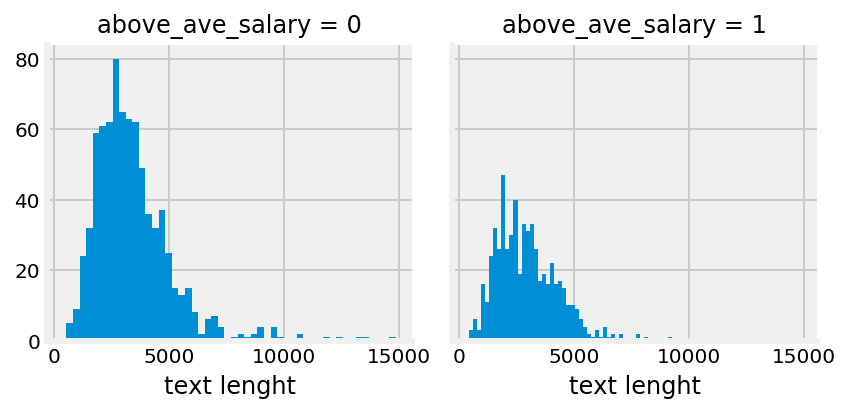

In [128]:

g= sns.FacetGrid(df,col='above_ave_salary')
g.map(plt.hist, 'text lenght',bins=50)

plotted the box plot to see the average of the text lenght in each target's category

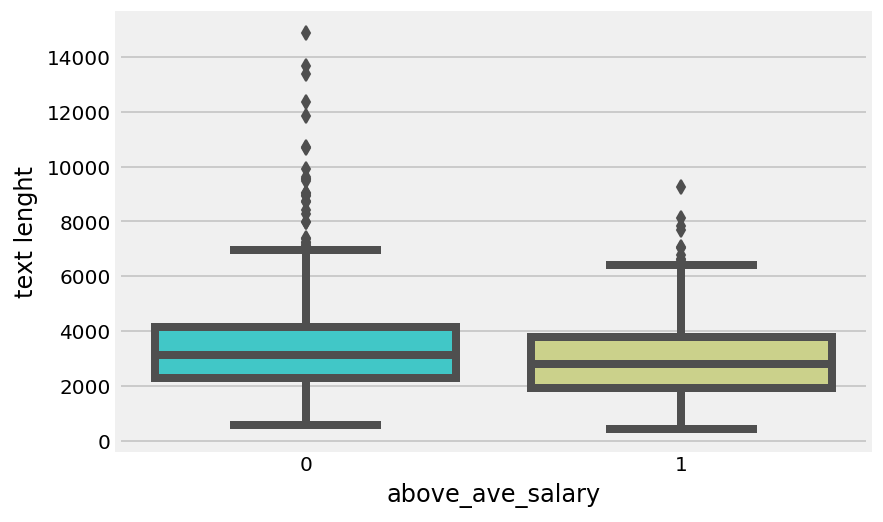

In [129]:
sns.boxplot(x='above_ave_salary',y='text lenght',data=df, palette='rainbow')

Overall the data of below the average has a lower text lenght. When plotted the count of the each target, the number of lower_ave_salary is higher than above_ave_salary.

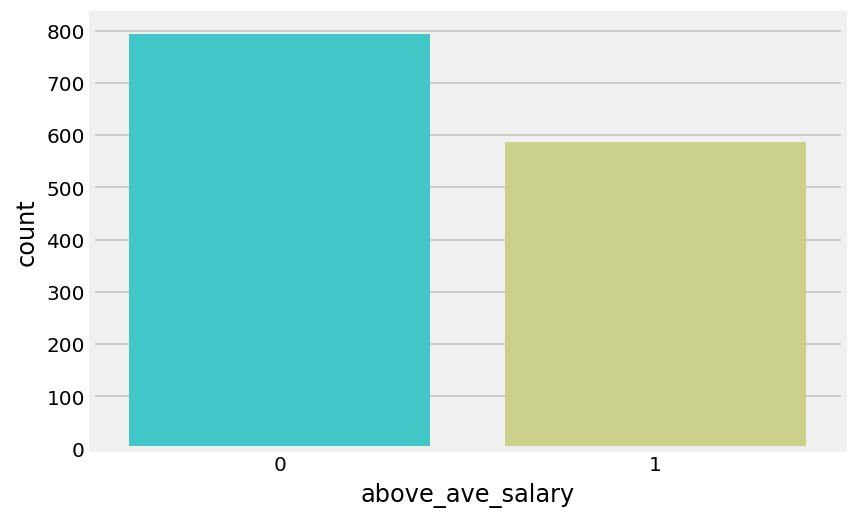

In [130]:
sns.countplot(x='above_ave_salary', data=df, palette='rainbow')

# Baseline

Now, I try to run the model to see the performance of the model by using countvectorizer and logistic regression with the raw data to see the base line as shown below.

In [131]:
X=df.job_description
y= df.above_ave_salary


# create document-term matrices
cvec= CountVectorizer()
X = cvec.fit_transform(X)
# use Logistic Regression to predict the above average salary

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42,test_size=0.3)


ls=LogisticRegression(max_iter=5000)
ls.fit(X_train,y_train)
y_pred=ls.predict(X_test)


# calculate accuracy
print('Accuracy Score: '+ str(accuracy_score(y_test, y_pred)))
print('f1_score'+ str(f1_score(y_test, y_pred)))

print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

Accuracy Score: 0.748792270531401
f1_score0.6976744186046512
[[190  49]
 [ 55 120]]


              precision    recall  f1-score   support

           0       0.78      0.79      0.79       239
           1       0.71      0.69      0.70       175

    accuracy                           0.75       414
   macro avg       0.74      0.74      0.74       414
weighted avg       0.75      0.75      0.75       414



result interpret

Next, I tried to use TF-IDF and logistic regression to run the same model by apply pipeline and print the confusion matrix and classification report same as above.

In [172]:
model=make_pipeline(TfidfVectorizer(), LogisticRegression())

X=df.job_description
y= df.above_ave_salary

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42,test_size=0.3)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy Score: '+ str(accuracy_score(y_test, y_pred)))
print('f1_score'+ str(f1_score(y_test, y_pred)))

print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

Accuracy Score: 0.751207729468599
f1_score0.6688102893890675
[[207  32]
 [ 71 104]]


              precision    recall  f1-score   support

           0       0.74      0.87      0.80       239
           1       0.76      0.59      0.67       175

    accuracy                           0.75       414
   macro avg       0.75      0.73      0.73       414
weighted avg       0.75      0.75      0.74       414



# DATA CLEANING

In this section, I did the data cleaning to the job description to find the improvement in the model.After have a look the job description, there are the Uppercase alphabet, punction, and word that nesscessary to categories in the same type. I will use regular expression and lemmatization to seperate and categorize the word the each job description.

In [133]:
df.job_description[0]

"Due to fantastic growth this organisation are looking for a big data engineering lead who can help them in a high performing team. You will be working in a collaborative team but will be expected to show an innovative and inquisitive mindset in solving big data problems. This organisation has an amazing office environment that is creative, fun and inclusive. Everyone is truly happy to work here and really believes in the company.While the this is far from greenfield we are looking for Senior Big Data Specialists who have a end to end big data implementation experience and greenfield big data projects. Having greenfield big data experience will definitely put you in an advantageous position.The ideal candidate will have:Experience working in a greenfield big data environmentEnd to end big data implementation experiencePassion for solving problems that has an impact on the businessStrong data modelling and data warehouse experienceIt would be amazing if you had experience with AirflowHa

In [134]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

<b>Remove punctuation and the unnecessary number from each job description and replace it with space by using regular expresion.

In [135]:
def clean_data1(text):
    text=text.lower()
    text=re.sub('\[.*?\]',' ', text)
    text=re.sub('[%s]'%re.escape(string.punctuation),' ',text)
    text=re.sub('\w*\d\w*',' ',text)
    return text
round1= lambda X: clean_data1[X]    

In [136]:
df.job_description.apply(clean_data1)[0]

'due to fantastic growth this organisation are looking for a big data engineering lead who can help them in a high performing team  you will be working in a collaborative team but will be expected to show an innovative and inquisitive mindset in solving big data problems  this organisation has an amazing office environment that is creative  fun and inclusive  everyone is truly happy to work here and really believes in the company while the this is far from greenfield we are looking for senior big data specialists who have a end to end big data implementation experience and greenfield big data projects  having greenfield big data experience will definitely put you in an advantageous position the ideal candidate will have experience working in a greenfield big data environmentend to end big data implementation experiencepassion for solving problems that has an impact on the businessstrong data modelling and data warehouse experienceit would be amazing if you had experience with airflowha

<b>use .apply to apply function clean_data to the all job description

In [137]:
df.job_description=df.job_description.apply(clean_data1)

<b>After first cleaning, there are still some word that we can normalize it such as looking and change to be look as it can classify as the same word,So I applied lemmatization to the word and try to normalize worsd.

In [138]:
df.job_description[0]

'due to fantastic growth this organisation are looking for a big data engineering lead who can help them in a high performing team  you will be working in a collaborative team but will be expected to show an innovative and inquisitive mindset in solving big data problems  this organisation has an amazing office environment that is creative  fun and inclusive  everyone is truly happy to work here and really believes in the company while the this is far from greenfield we are looking for senior big data specialists who have a end to end big data implementation experience and greenfield big data projects  having greenfield big data experience will definitely put you in an advantageous position the ideal candidate will have experience working in a greenfield big data environmentend to end big data implementation experiencepassion for solving problems that has an impact on the businessstrong data modelling and data warehouse experienceit would be amazing if you had experience with airflowha

<b> apply lemmatizer and tokenizer to use as a function to clean a data i nthe second round

In [139]:
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def clean_data2(text):
     return' '.join([lemmatizer.lemmatize(w,pos='v') for w in w_tokenizer.tokenize(text)])

In [140]:
df.job_description=df.job_description.apply(clean_data2)

In [141]:
df.job_description[0]

'due to fantastic growth this organisation be look for a big data engineer lead who can help them in a high perform team you will be work in a collaborative team but will be expect to show an innovative and inquisitive mindset in solve big data problems this organisation have an amaze office environment that be creative fun and inclusive everyone be truly happy to work here and really believe in the company while the this be far from greenfield we be look for senior big data specialists who have a end to end big data implementation experience and greenfield big data project have greenfield big data experience will definitely put you in an advantageous position the ideal candidate will have experience work in a greenfield big data environmentend to end big data implementation experiencepassion for solve problems that have an impact on the businessstrong data model and data warehouse experienceit would be amaze if you have experience with airflowhave a passion for big data and lack a fea

<b> As you can see, there are improvment in word as are change to be 'be' and looking and change to be 'look' but there are still room for improvement such as 'skillsresponsibilitiesdata' this word is attach together and might be a outlier of the model. or 'managementleading' which might make a model confuse about the word as it attach the word management and leading together. 

<b>Next, I try to look at the individual word as the document and see that the frequency of each word that happen in each job descrisption. my hypothesis that if there are any word that happen more than half of all job, I will exclude it from the term matrics which assume that it will not has a impact to the model which might help improve accuracy of the model

In [155]:
X=df.job_description
y= df.above_ave_salary

cvec= CountVectorizer(stop_words='english')
X= cvec.fit_transform(X)
X

<1380x15834 sparse matrix of type '<class 'numpy.int64'>'
	with 259759 stored elements in Compressed Sparse Row format>

<b> create a term matrix and tranpose it by using count vectorizer

In [156]:
description_word=pd.DataFrame(X.todense(),columns=cvec.get_feature_names()).T

In [157]:
description_word

,0,1,2,3,4,5,6,7,8,9,...,1370,1371,1372,1373,1374,1375,1376,1377,1378,1379
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aahl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aai,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zonecomplimentary,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zonesutilise,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zookeeper,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<b> find the top 30 word in each job

In [160]:
top_word={}
for i in description_word.columns:
    top=description_word[i].sort_values(ascending=False).head(30)
    top_word[i]=list(zip(top.index,top.values))

top_word

{0: [('data', 19),
  ('big', 12),
  ('experience', 5),
  ('work', 5),
  ('greenfield', 4),
  ('amaze', 3),
  ('end', 3),
  ('implementation', 2),
  ('organisation', 2),
  ('look', 2),
  ('solve', 2),
  ('problems', 2),
  ('warehouse', 2),
  ('team', 2),
  ('fear', 1),
  ('favourablestrong', 1),
  ('new', 1),
  ('source', 1),
  ('algorithms', 1),
  ('preparation', 1),
  ('python', 1),
  ('far', 1),
  ('fantastic', 1),
  ('managementleading', 1),
  ('thingsexperience', 1),
  ('believe', 1),
  ('solutions', 1),
  ('help', 1),
  ('collaborative', 1),
  ('feature', 1)],
 1: [('data', 14),
  ('engineer', 4),
  ('architecture', 3),
  ('optimize', 3),
  ('relevant', 2),
  ('technologies', 2),
  ('work', 2),
  ('support', 2),
  ('ssis', 2),
  ('initiatives', 2),
  ('experience', 2),
  ('ms', 1),
  ('point', 1),
  ('products', 1),
  ('word', 1),
  ('follow', 1),
  ('skillsets', 1),
  ('apply', 1),
  ('excite', 1),
  ('justify', 1),
  ('responsible', 1),
  ('consider', 1),
  ('melbourne', 1),
  (

<b> find the word that happen in most job.

In [159]:
words=[]
for id in description_word.columns:
    top=[word for [word, count] in top_word[id]]
    for t in top:
        words.append(t)

After exclude the stopword out of the all word, there are several word that happen in more than half of the job which is 690: 'work', 'experience', 'team','data'

In [165]:
most_common=Counter(words).most_common()
most_common[0:10]

[('work', 1031),
 ('experience', 1030),
 ('team', 756),
 ('data', 715),
 ('role', 658),
 ('skills', 612),
 ('business', 528),
 ('include', 472),
 ('support', 430),
 ('development', 404)]

I added this data to the stopword('english') list and apply it to the model to see the improvement

In [168]:
potential_common=[]
for i in most_common[0:4]:
    potential_common.append(i[0])
print(potential_common)
stopword_eng=stopwords.words('english')
stopword_eng.extend(potential_common)

['work', 'experience', 'team', 'data']


In [186]:
X=df.job_description
y= df.above_ave_salary
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42,test_size=0.3)

# create document-term matrices
cvec= CountVectorizer(stop_words= stopword_eng)
X_train_cvec=cvec.fit_transform(X_train)
X_test_cvec=cvec.transform(X_test)
# use Logistic Regression to predict the above average salary
ls=LogisticRegression(max_iter=5000)
ls.fit(X_train_cvec,y_train)
y_pred_full=ls.predict(X_test_cvec)


# calculate accuracy
print('Accuracy Score: '+ str(accuracy_score(y_test, y_pred_full)))
print('f1_score'+ str(f1_score(y_test, y_pred_full)))


Accuracy Score: 0.7681159420289855
f1_score0.7257142857142859


# Question 1 Classification of the Salary

<b>TfidfVectorizer and Logistic regression

In [176]:
model=make_pipeline(TfidfVectorizer(stop_words= stopword_eng), LogisticRegression())

X=df.job_description
y= df.above_ave_salary

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42,test_size=0.3)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy Score: '+ str(accuracy_score(y_test, y_pred)))
print('f1_score'+ str(f1_score(y_test, y_pred)))

print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

Accuracy Score: 0.7608695652173914
f1_score0.6876971608832808
[[206  33]
 [ 66 109]]


              precision    recall  f1-score   support

           0       0.76      0.86      0.81       239
           1       0.77      0.62      0.69       175

    accuracy                           0.76       414
   macro avg       0.76      0.74      0.75       414
weighted avg       0.76      0.76      0.76       414



<b>As you see fron the above result, There are some improvement in accuracy Score of the model when compare it to without stopword and stopword='english'

without stopword:

Accuracy Score:  0.751207729468599

f1_score: 0.6688102893890675

stopword='english':

Accuracy Score: 0.7391304347826086

f1_score: 0.6560509554140128

<b>In next model, I applied DecisionTreeClassifier to identify the feature important and the word that will result in the above average salary job.

In [200]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier


X=df.job_description
y= df.above_ave_salary
tfidf= TfidfVectorizer(stop_words=stopword_eng)

X=tfidf.fit_transform(X)

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42,test_size=0.3)

dt = DecisionTreeClassifier(max_depth = 3, min_samples_split = 2) 

dt.fit(X_train, y_train)

y_pred_full=dt.predict(X_test)


# calculate accuracy
print('Accuracy Score: '+ str(accuracy_score(y_test, y_pred)))
print('f1_score: '+ str(f1_score(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

Accuracy Score: 0.6183574879227053
f1_score: 0.3923076923076923
[[205  34]
 [124  51]]


              precision    recall  f1-score   support

           0       0.62      0.86      0.72       239
           1       0.60      0.29      0.39       175

    accuracy                           0.62       414
   macro avg       0.61      0.57      0.56       414
weighted avg       0.61      0.62      0.58       414



<b> plot the decision tree

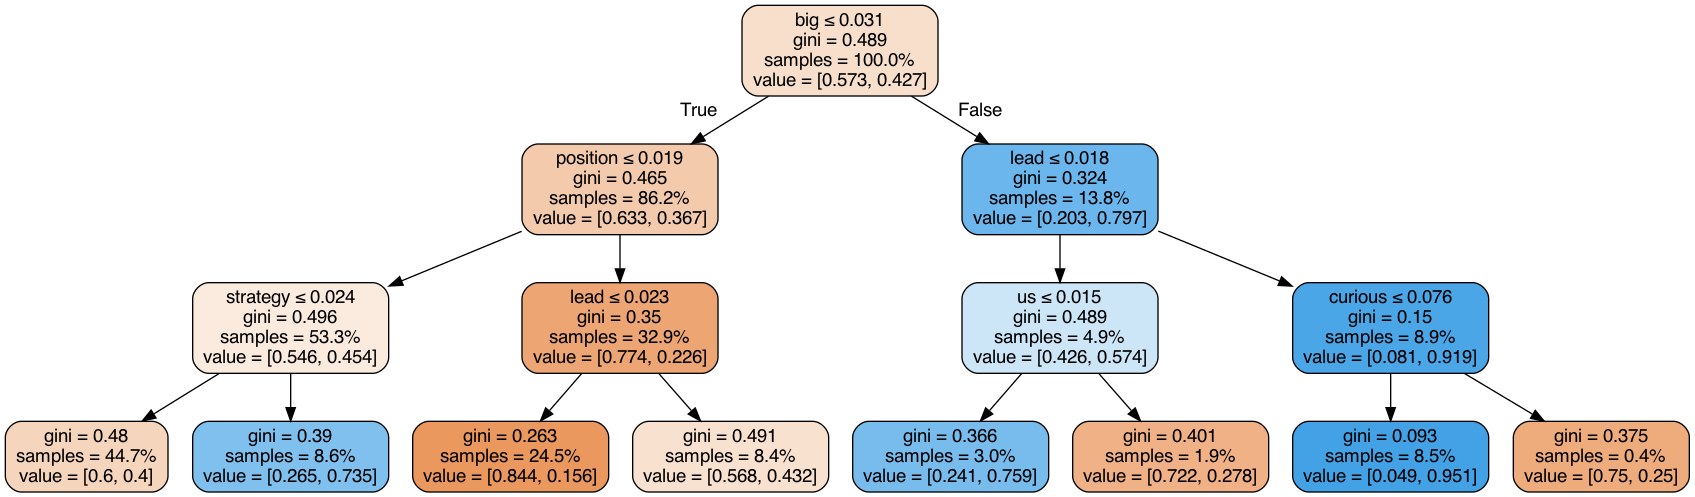

In [201]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data,feature_names=tfidf.get_feature_names(),filled=True, rounded=True,proportion=True,special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

In [202]:
importances = pd.DataFrame(list(dt.feature_importances_),
                           index=tfidf.get_feature_names(), columns=['dt_importance'])               
print(importances.sort_values('dt_importance',ascending=False).head())

dt_top5=importances.sort_values('dt_importance',ascending=False).head()

          dt_importance
big            0.408575
position       0.197158
lead           0.158196
strategy       0.150321
us             0.049558


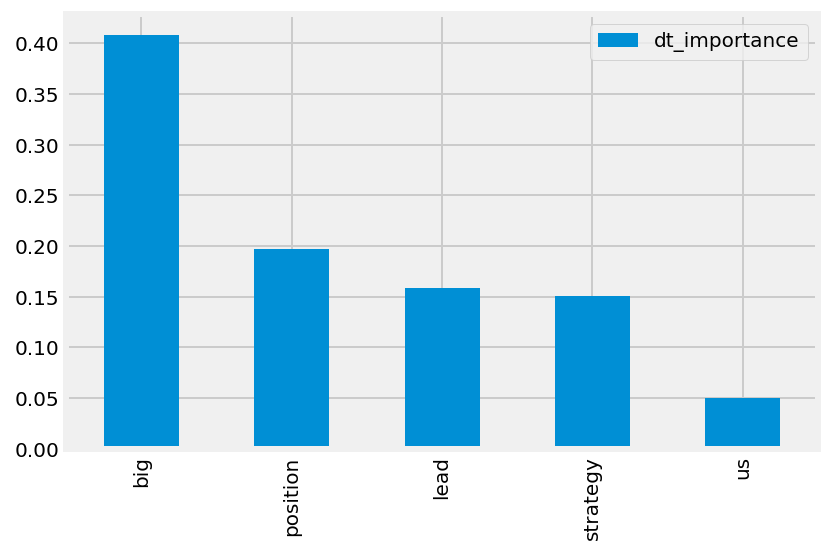

In [203]:
dt_top5.plot(kind='bar')

<b> The graph above show the top five word that will affect the salary of the job. big is  the word that will result in the above average salary.

# Question 2: Factors that distinguish job category

<b>In this question, I want to identify the components of a job posting distinguish data scientist job from other data jobs by filter the job title and assign the value of it to 1. So, the others job will be assign the value to 0. Next, I will run the model to countvectorizer and concat all the feature together to identify the potential of information that will identify data scientist job

<b>As you can see from the value count, there are only 25 job that has a title data scientist. but there will be a job that have the extend of the title but still contain word data scientist. So, I will use str.contain to filter the word data scientist and assign value 1 to it for the usage in the classification problem.

In [249]:
df.title.value_counts()


data engineer                                                  30
data scientist                                                 25
data analyst                                                   16
software engineer                                               7
senior data engineer                                            6
                                                               ..
vitality member services representative - 12 month contract     1
senior/clinical research associate                              1
sales manager                                                   1
2pt science leader of learning - marian catholic college        1
senior clinical trials officer                                  1
Name: title, Length: 1203, dtype: int64

In [258]:
#f.title.str.contains('data scientist')
df.title=df.title.str.lower()
df['Data']=df.title.str.contains('data scientist')
df['Data']=df.Data.apply(lambda x: 1 if x==True else 0 )
df['Data'].value_counts()

0    1318
1      62
Name: Data, dtype: int64

<b> The result above shows that there are 62 job that contain word"data scientist" and 1318 jobs which title do not contain "data scientist" in the job title.

In [259]:
df.columns

Index(['title', 'job_teaser', 'advertiser', 'work_type', 'classification',
       'location', 'job_description', 'estimated_salary', 'above_ave_salary',
       'text lenght', 'Data'],
      dtype='object')

I will use all of the information provide in dataframe to create model of data science job. first of all I need to do the normalizing the word and create term frequency matrix and concat it together as a whole feature variables by apply clean_data1 and clean_data2 function.

In [263]:
df.head(3)

,title,job_teaser,advertiser,work_type,classification,location,job_description,estimated_salary,above_ave_salary,text lenght,Data
0,big data engineer - machine learning,be you ready to use machine learn in one of th...,Morgan McKinley,Full Time,Science & Technology,Sydney,due to fantastic growth this organisation be l...,55000.0,0,1849,0
1,ssis/data engineer,randstad have partner with an industry lead fi...,Randstad Technologies,Full Time,Information & Communication Technology,Melbourne,randstad have partner with an industry lead fi...,55000.0,0,1372,0
2,data warehouse engineer - analytics,a great opportunity to build and have impact l...,Robert Walters,Full Time,Information & Communication Technology,Sydney,we be currently hire for a newly create positi...,55000.0,0,1094,0


In [267]:
df.job_teaser=df.job_teaser.apply(clean_data1)
df.job_teaser=df.job_teaser.apply(clean_data2)
df.location=df.location.str.lower()
df.advertiser=df.advertiser.str.lower()
df.work_type=df.work_type.str.lower()
df.classification=df.classification.apply(clean_data1)
df.classification=df.classification.apply(clean_data2)

In [268]:
df.head(3)

,title,job_teaser,advertiser,work_type,classification,location,job_description,estimated_salary,above_ave_salary,text lenght,Data
0,big data engineer - machine learning,be you ready to use machine learn in one of th...,morgan mckinley,full time,science technology,sydney,due to fantastic growth this organisation be l...,55000.0,0,1849,0
1,ssis/data engineer,randstad have partner with an industry lead fi...,randstad technologies,full time,information communication technology,melbourne,randstad have partner with an industry lead fi...,55000.0,0,1372,0
2,data warehouse engineer - analytics,a great opportunity to build and have impact l...,robert walters,full time,information communication technology,sydney,we be currently hire for a newly create positi...,55000.0,0,1094,0


In [311]:
feature=['job_teaser','advertiser','work_type','classification','location','job_description']
X=df[feature]
y=df.Data

<b>I seperately do the CountVectorizer to all feature and concat it to create a dataframe

In [312]:
cvec=CountVectorizer(stop_words=stopword_eng)
X1=cvec.fit_transform(X.job_teaser)
X1=pd.DataFrame(X1.todense(), columns=cvec.get_feature_names())
X2=cvec.fit_transform(X.advertiser)
X2=pd.DataFrame(X2.todense(), columns=cvec.get_feature_names())
X3=cvec.fit_transform(X.work_type)
X3=pd.DataFrame(X3.todense(), columns=cvec.get_feature_names())
X4=cvec.fit_transform(X.classification)
X4=pd.DataFrame(X4.todense(), columns=cvec.get_feature_names())
X5=cvec.fit_transform(X.location)
X5=pd.DataFrame(X5.todense(), columns=cvec.get_feature_names())
X6=cvec.fit_transform(X.job_description)
X6=pd.DataFrame(X6.todense(), columns=cvec.get_feature_names())
print(X1.shape)
print(X2.shape)
print(X3.shape)
print(X4.shape)
print(X5.shape)
print(X6.shape)
pdList = [X1,X2,X3,X4,X5,X6]  # List of your dataframes
X = pd.concat(pdList,axis=1)

(1380, 2803)
(1380, 1035)
(1380, 2)
(1380, 59)
(1380, 94)
(1380, 15968)


You can see that after concat it together, there will be one matrix which I will use to create a model and predict the factor that will tell the Data scientist job

In [315]:
X

,abacus,abilities,ability,aboriginal,abuse,academic,academics,academy,accelerate,acceleration,...,zipform,zlatanov,zn,zoho,zolghadri,zone,zonecomplimentary,zonesutilise,zookeeper,zoology
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<b> Apply RandomForestClassifier

In [318]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42,test_size=0.3)
rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)

rf.fit(X_train, y_train)

y_pred=rf.predict(X_test)


# calculate accuracy
print('Accuracy Score: '+ str(accuracy_score(y_test, y_pred)))
print('f1_score'+ str(f1_score(y_test, y_pred)))

print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

Accuracy Score: 0.9541062801932367
f1_score0.09523809523809523
[[394   0]
 [ 19   1]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.98       394
           1       1.00      0.05      0.10        20

    accuracy                           0.95       414
   macro avg       0.98      0.53      0.54       414
weighted avg       0.96      0.95      0.93       414



<b>Apply DecisionTreeClassifier

In [331]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42,test_size=0.3)

dt = DecisionTreeClassifier(max_depth = 3, min_samples_split = 2) 

dt.fit(X_train, y_train)

y_pred=dt.predict(X_test)


# calculate accuracy
print('Accuracy Score: '+ str(accuracy_score(y_test, y_pred)))
print('f1_score'+ str(f1_score(y_test, y_pred)))

print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

Accuracy Score: 0.9685990338164251
f1_score0.6976744186046512
[[386   8]
 [  5  15]]


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       394
           1       0.65      0.75      0.70        20

    accuracy                           0.97       414
   macro avg       0.82      0.86      0.84       414
weighted avg       0.97      0.97      0.97       414



<b> Plot the Decision tree

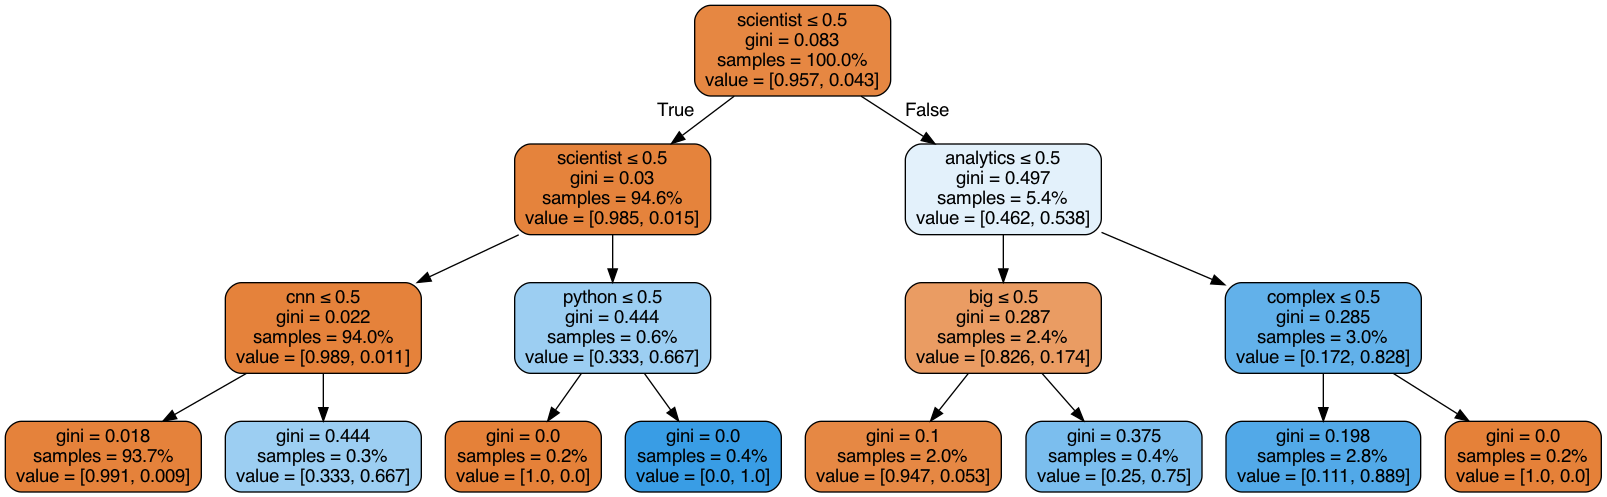

In [328]:
dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data,feature_names=X.columns,filled=True, rounded=True,proportion=True,special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Use the Feature importanct to identify top 5 word of Random Forest and DecisionTree

In [323]:
importances = pd.DataFrame(list(zip(dt.feature_importances_,rf.feature_importances_,)),
                           index=X.columns, columns=['dt_importance','rf_importance'])               
print(importances.sort_values('rf_importance',ascending=False).head())
print(importances.sort_values('dt_importance',ascending=False).head())

rf_top5=importances.sort_values('rf_importance',ascending=False).head()
dt_top5=importances.sort_values('dt_importance',ascending=False).head()

             dt_importance  rf_importance
scientist         0.494794       0.024911
python            0.000000       0.019531
statistics        0.000000       0.018179
model             0.000000       0.016240
statistical       0.000000       0.010460
           dt_importance  rf_importance
scientist       0.494794       0.024911
analytics       0.201397       0.004795
scientist       0.094156       0.005868
big             0.059050       0.010242
treat           0.054063       0.000000


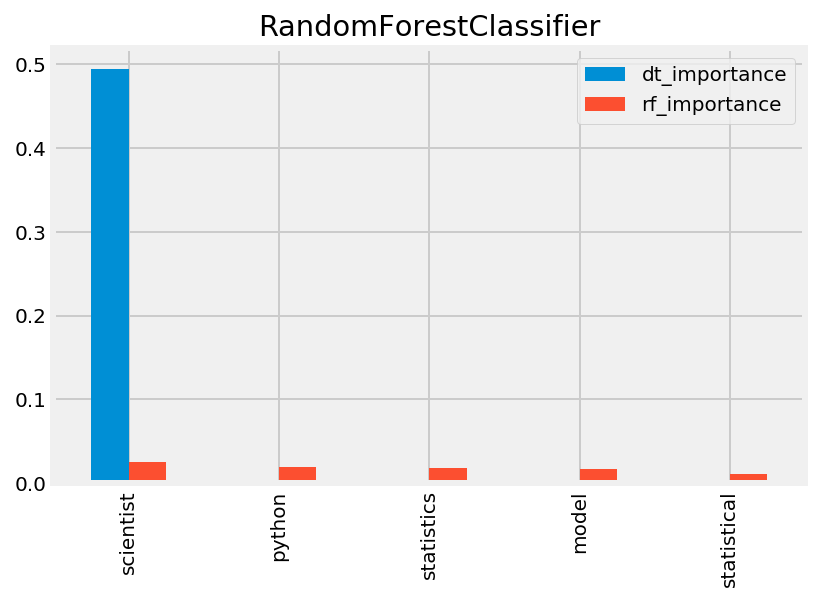

In [329]:
rf_top5.plot(kind='bar',title='RandomForestClassifier')

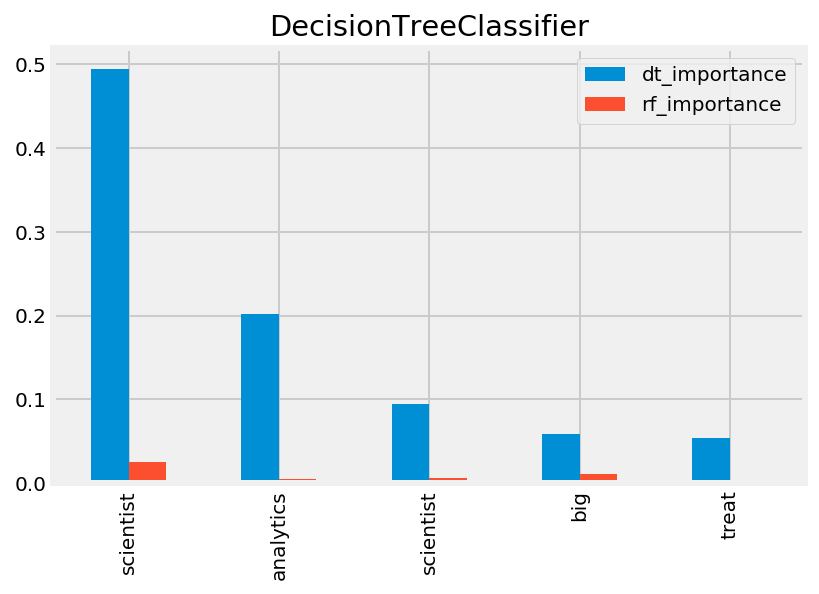

In [330]:
dt_top5.plot(kind='bar',title='DecisionTreeClassifier')